In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns

# reproducibility
random.seed(0)

## The Palmer penguins dataset

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Features
- `species`: a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- `island`: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- `bill_length_mm`: a number denoting bill length (millimeters)
- `bill_depth_mm`: a number denoting bill depth (millimeters)
- `flipper_length_mm`: an integer denoting flipper length (millimeters)
- `body_mass_g`: an integer denoting body mass (grams)
- `sex`: a factor denoting penguin sex (female, male)

### Encoding

In [4]:

# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df[['island','species']], prefix=['island', 'species'])], axis=1)
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['island', 'species', 'sex'],axis=1, inplace=True)

### Missing data
#### Numerical

In [5]:
# simulating missing values
column = 'body_mass_g'
missing_pct = .4

missing_rows = np.random.choice(
    range(df[column].shape[0]),
    size=int(df[column].shape[0] * missing_pct),
    replace=False
)

df.loc[missing_rows, column] = np.NaN

In [6]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0,0,1
1,39.5,17.4,186.0,NaN,0,0,1,1,0,0,1,0
2,40.3,18.0,195.0,NaN,0,0,1,1,0,0,1,0
3,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,0
4,36.7,19.3,193.0,NaN,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0,0,0,1,1,0
341,50.4,15.7,222.0,NaN,1,0,0,0,0,1,0,1
342,45.2,14.8,212.0,NaN,1,0,0,0,0,1,1,0


#### Eliminate rows with missing data

In [7]:
df.dropna()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,1,1,0,0,0,1
6,38.9,17.8,181.0,3625.0,0,0,1,1,0,0,1,0
8,34.1,18.1,193.0,3475.0,0,0,1,1,0,0,0,0
11,37.8,17.3,180.0,3700.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
334,46.2,14.1,217.0,4375.0,1,0,0,0,0,1,1,0
335,55.1,16.0,230.0,5850.0,1,0,0,0,0,1,0,1
337,48.8,16.2,222.0,6000.0,1,0,0,0,0,1,0,1
338,47.2,13.7,214.0,4925.0,1,0,0,0,0,1,1,0


#### Eliminate columns with missing data

In [8]:
df.dropna(axis=1)

,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_Female,sex_Male
0,0,0,1,1,0,0,0,1
1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,0
4,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
339,1,0,0,0,0,1,0,0
340,1,0,0,0,0,1,1,0
341,1,0,0,0,0,1,0,1
342,1,0,0,0,0,1,1,0


#### Imputation: mean, median, mode

In [9]:
# df.fillna(df.mean())
df.fillna(df.median())
# df.fillna(df.mode().squeeze())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_Female,sex_Male
0,39.10,18.7,181.0,3750.0,0,0,1,1,0,0,0,1
1,39.50,17.4,186.0,4025.0,0,0,1,1,0,0,1,0
2,40.30,18.0,195.0,4025.0,0,0,1,1,0,0,1,0
3,44.45,17.3,197.0,4025.0,0,0,1,1,0,0,0,0
4,36.70,19.3,193.0,4025.0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4025.0,1,0,0,0,0,1,0,0
340,46.80,14.3,215.0,4850.0,1,0,0,0,0,1,1,0
341,50.40,15.7,222.0,4025.0,1,0,0,0,0,1,0,1
342,45.20,14.8,212.0,4025.0,1,0,0,0,0,1,1,0


<AxesSubplot:ylabel='Frequency'>

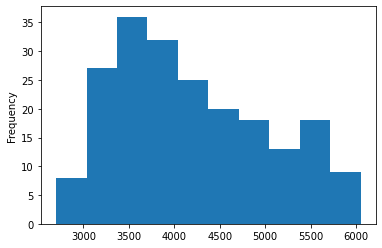

In [10]:
df['body_mass_g'].plot(kind='hist')

#### Imputation: simple interpolation
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/1200px-LinearInterpolation.svg.png" width="500">
</center>

#### Imputation: classification/regression models

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.neighbors import KNeighborsRegressor

imputer = IterativeImputer() # estimator=BayesianRidge()... 

pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_Female,sex_Male
0,39.100000,18.700000,181.000000,3750.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,39.500000,17.400000,186.000000,3336.466939,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,40.300000,18.000000,195.000000,3582.495433,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,37.886408,18.274555,188.373813,3390.114758,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,36.700000,19.300000,193.000000,3519.204768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,46.228742,14.771648,213.752514,4762.199620,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
340,46.800000,14.300000,215.000000,4850.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
341,50.400000,15.700000,222.000000,5465.627732,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
342,45.200000,14.800000,212.000000,4704.266579,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)